In [1]:
import numpy as np
import xarray as xr
import pandas as pd

from scipy import signal
import dask

import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker
from mpl_toolkits.basemap import Basemap

%matplotlib inline

### Load datasets

In [2]:
# Main disagnostic output
ecco = xr.open_zarr('/home/jet/data/ecco/zarr/eccov4r3_output/').sel(face=[2,10])

In [3]:
# Budget terms
budg = xr.open_zarr('/home/jet/data/ecco/zarr/old/eccov4r3_budgets.zlib/').sel(face=[2,10])

In [4]:
# Volume (m^3)
vol = (ecco.rA*ecco.drF*ecco.hFacC).transpose('face','k','j','i')

In [5]:
# Volume fluxes (m^3/s)
budg_vol = budg*vol

### Connect faces for SPNA (`face` `2` and `10`)

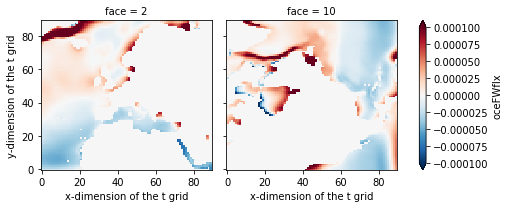

In [6]:
plt.figure(figsize=(8,5))
ecco.oceFWflx.mean('time').plot(col='face', col_wrap=2, vmin=-1e-4, vmax=1e-4, cmap='RdBu_r')

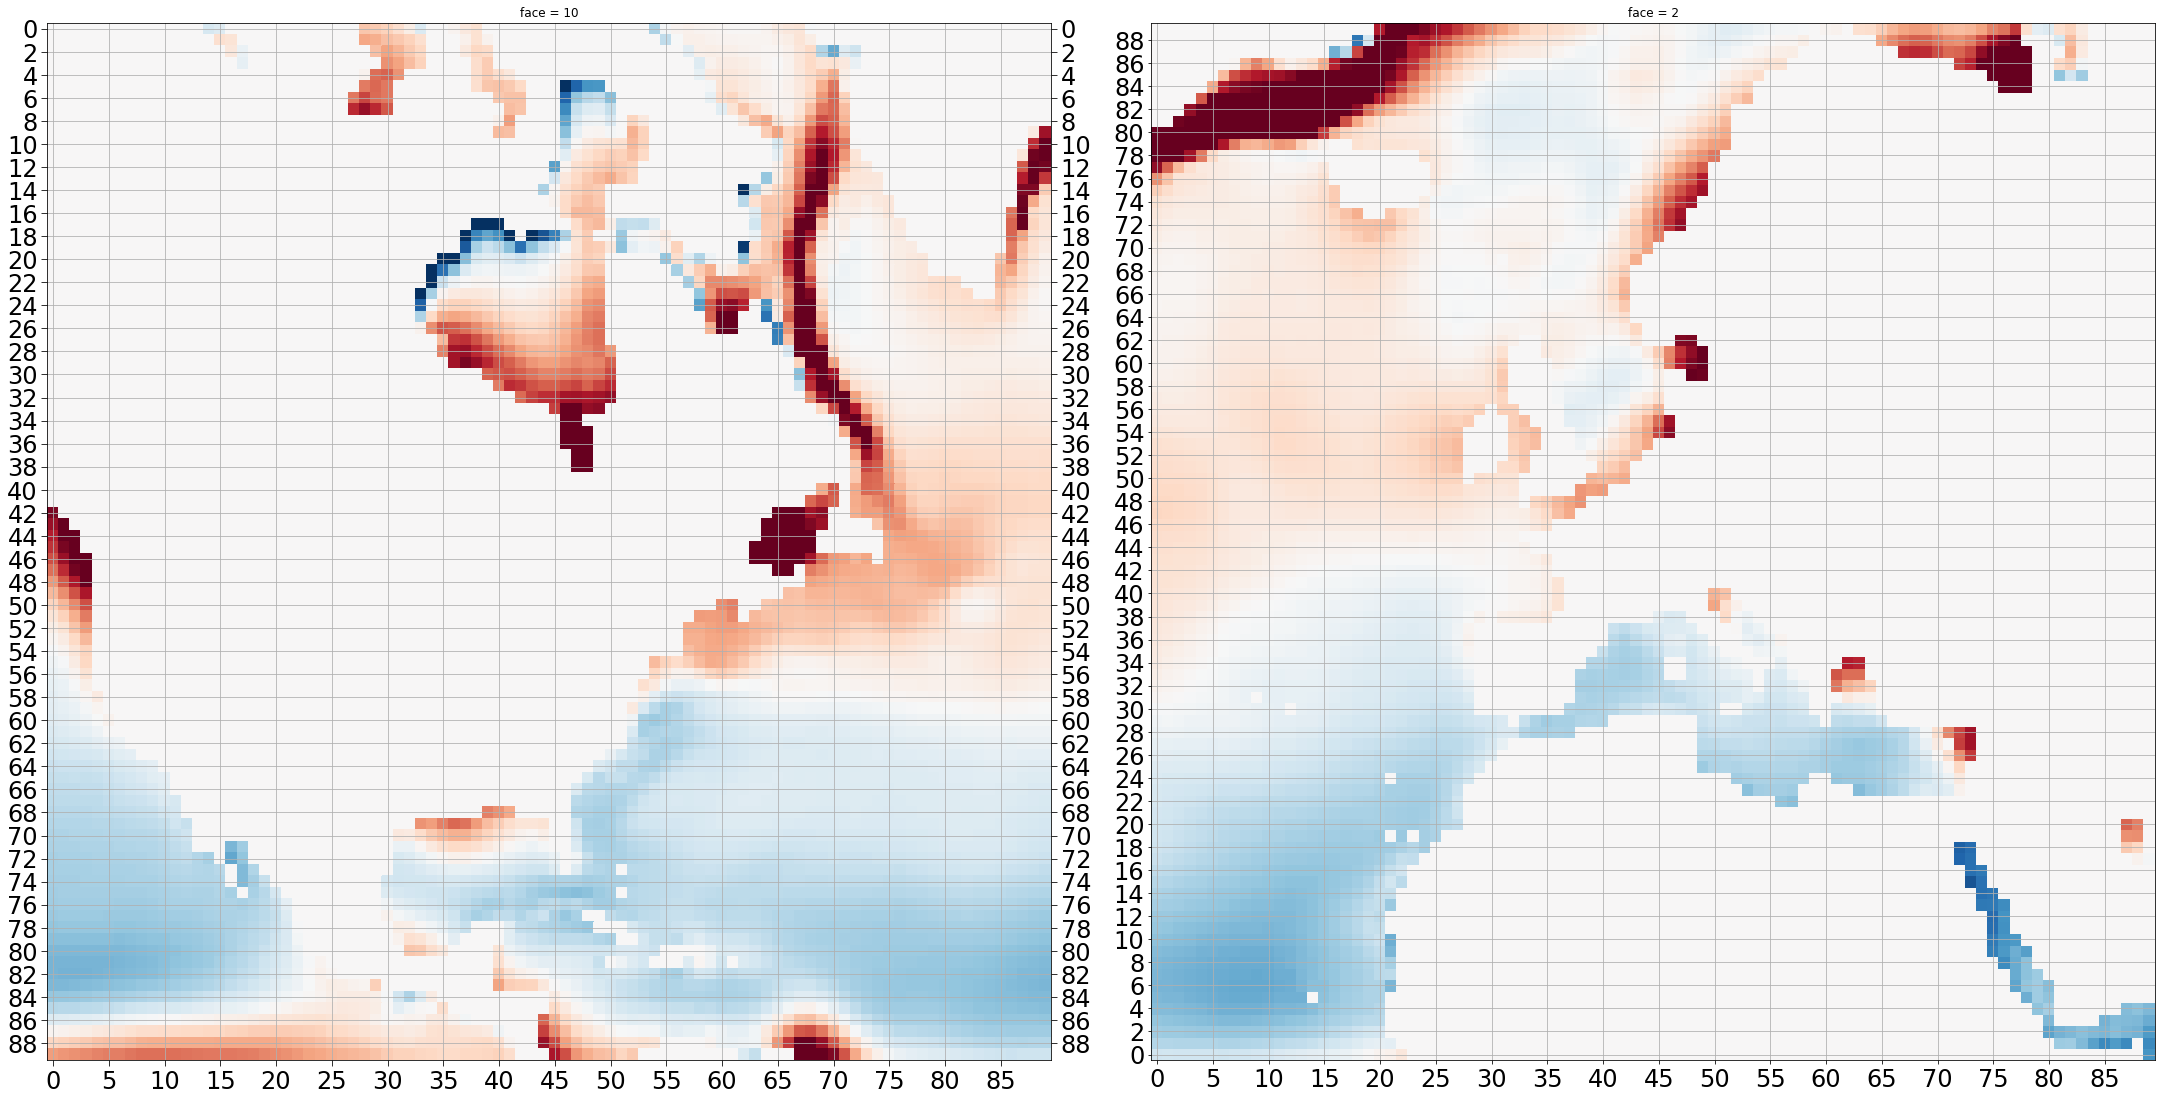

In [10]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(30,15))
fig.tight_layout()
fig.subplots_adjust(wspace=0.1)

plt.subplot(1, 2, 1)
ecco.oceFWflx.mean('time')[1].transpose().plot(vmin=-1e-4, vmax=1e-4, cmap='RdBu_r',
                                               add_colorbar=False, yincrease=False)
plt.xticks(np.arange(0,90,5))
plt.yticks(np.arange(0,90,2))
plt.gca().xaxis.set_tick_params(labelsize=24)
plt.gca().yaxis.set_tick_params(labelsize=24)
plt.xlabel('')
plt.ylabel('')
plt.tick_params(length=6,right=True,labelright=True)
plt.grid(True)

plt.subplot(1, 2, 2)
ecco.oceFWflx.mean('time')[0].plot(vmin=-1e-4, vmax=1e-4, cmap='RdBu_r', add_colorbar=False)
plt.xticks(np.arange(0,90,5))
plt.yticks(np.arange(0,90,2))
plt.gca().xaxis.set_tick_params(labelsize=24)
plt.gca().yaxis.set_tick_params(labelsize=24)
plt.xlabel('')
plt.ylabel('')
plt.grid(True)
plt.show()

In [7]:
west1 = 60
east0 = 29

north1 = 11
south1 = 38

north0 = 89-north1
south0 = 89-south1

In [8]:
# Make copy of hFacC
mskC = ecco.hFacC.copy(deep=True).load()
mskC.values[mskC.values>0] = 1

land_mask = mskC[0]
land_mask.values[land_mask.values==0] = np.nan

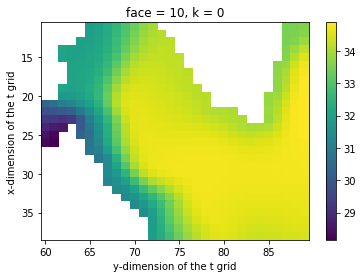

In [13]:
(ecco.SALT.mean('time')*land_mask)[0,1,west1:,north1:south1+1].transpose().plot(yincrease=False)

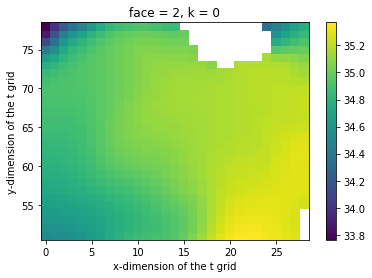

In [14]:
(ecco.SALT.mean('time')*land_mask)[0,0,south0:north0+1,:east0].plot()

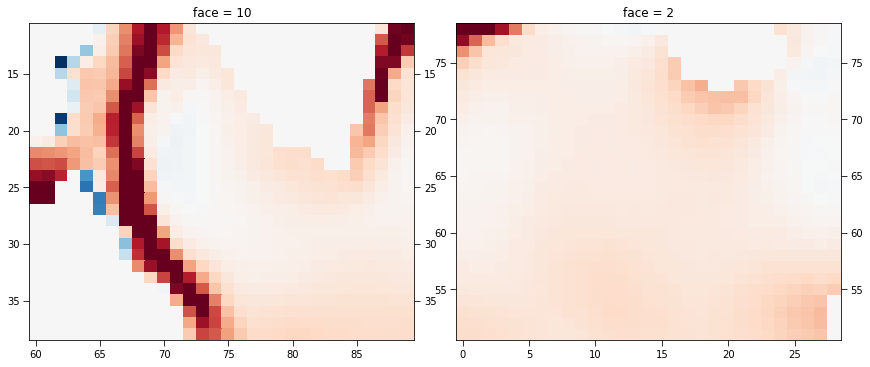

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
fig.tight_layout()

plt.subplot(1, 2, 1)
ecco.oceFWflx.mean('time')[1,west1:,north1:south1+1].transpose().plot(vmin=-1e-4, vmax=1e-4, cmap='RdBu_r',
                                                                   add_colorbar=False, yincrease=False)
plt.xlabel('')
plt.ylabel('')
plt.tick_params(length=6,right=True,labelright=True)

plt.subplot(1, 2, 2)
ecco.oceFWflx.mean('time')[0,south0:north0+1,:east0].plot(vmin=-1e-4, vmax=1e-4, cmap='RdBu_r',add_colorbar=False)
plt.xlabel('')
plt.ylabel('')
plt.tick_params(length=6,right=True,labelright=True)

plt.show()

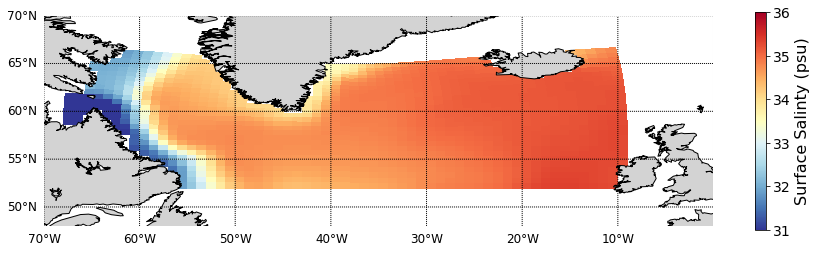

In [18]:
fig, ax = plt.subplots(figsize=(15,4))
m = Basemap(projection='cyl', llcrnrlat=48,urcrnrlat=70, llcrnrlon=-70, urcrnrlon=0, lat_ts=0,
            resolution='l', ax=ax)

m.fillcontinents(color='lightgrey')
m.drawcoastlines()
m.drawparallels(np.arange(-60,80,5),labels=[1,0,0,0],fontsize=12)
m.drawmeridians(np.arange(0,360,10),labels=[0,0,0,1],fontsize=12)

p=(ecco.SALT.mean('time')*land_mask)[0,1,west1:,north1:south1+1].plot(ax=ax, x='XC', y='YC', add_colorbar=False,
                                                                       vmin=31, vmax=36, cmap='RdYlBu_r')
ax.axis('off')
(ecco.SALT.mean('time')*land_mask)[0,0,south0:north0+1,:east0].plot(ax=ax, x='XC', y='YC', add_colorbar=False,
                                                                    vmin=31, vmax=36, cmap='RdYlBu_r')
ax.axis('off')
plt.title('')

cb = fig.colorbar(p,ticks=np.arange(31,37,1.0))
cb.set_label(r'Surface Salinty (psu)',fontsize=16)
cb.ax.tick_params(labelsize=14)

#plt.savefig('/tmp/figure.png')
plt.show()

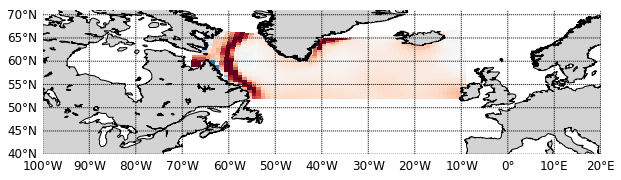

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
m = Basemap(projection='cyl', llcrnrlat=40,urcrnrlat=71, llcrnrlon=-100, urcrnrlon=20, lat_ts=0,
            resolution='l', ax=ax)

m.fillcontinents(color='lightgrey')
m.drawcoastlines()
m.drawparallels(np.arange(-60,80,5),labels=[1,0,0,0],fontsize=12)
m.drawmeridians(np.arange(0,360,10),labels=[0,0,0,1],fontsize=12)
ecco.oceFWflx.mean('time')[1,west1:,north1:south1+1].plot(ax=ax, x='XC', y='YC', add_colorbar=False,
                                                          vmin=-1e-4, vmax=1e-4, cmap='RdBu_r')
ax.axis('off')
ecco.oceFWflx.mean('time')[0,south0:north0+1,:east0].plot(ax=ax, x='XC', y='YC', add_colorbar=False,
                                                          vmin=-1e-4, vmax=1e-4, cmap='RdBu_r')
ax.axis('off')
plt.title('')

#plt.savefig('/tmp/figure.png')
plt.show()

# `budg`

In [9]:
# Salinity tendency (psu m^3/s)
tendSln0 = budg_vol.tendSln[:,0,:,south0:north0+1,:east0].sum(dim=['k','j','i'])
tendSln1 = budg_vol.tendSln[:,1,:,west1:,north1:south1+1].sum(dim=['k','j','i'])
tendSln = tendSln0 + tendSln1

# Forcing (psu m^3/s)
forcSln0 = budg_vol.forcSln[:,0,:,south0:north0+1,:east0].sum(dim=['k','j','i'])
forcSln1 = budg_vol.forcSln[:,1,:,west1:,north1:south1+1].sum(dim=['k','j','i'])
forcSln = forcSln0 + forcSln1

# Advection (psu m^3/s)
adv_ConvSln0 = (budg_vol.adv_hConvSln + budg_vol.adv_vConvSln)[:,0,:,south0:north0+1,:east0].sum(dim=['k','j','i'])
adv_ConvSln1 = (budg_vol.adv_hConvSln + budg_vol.adv_vConvSln)[:,1,:,west1:,north1:south1+1].sum(dim=['k','j','i'])
adv_ConvSln = adv_ConvSln0 + adv_ConvSln1

# Diffusion (psu m^3/s)
dif_ConvSln0 = (budg_vol.dif_hConvSln + budg_vol.dif_vConvSln)[:,0,:,south0:north0+1,:east0].sum(dim=['k','j','i'])
dif_ConvSln1 = (budg_vol.dif_hConvSln + budg_vol.dif_vConvSln)[:,1,:,west1:,north1:south1+1].sum(dim=['k','j','i'])
dif_ConvSln = dif_ConvSln0 + dif_ConvSln1

# Total convergence (psu m^3/s)
ConvSln = adv_ConvSln + dif_ConvSln

# Sum of terms (psu m^3/s)
totalSln = ConvSln + forcSln

In [10]:
results = dask.compute(tendSln, forcSln, adv_ConvSln, dif_ConvSln, ConvSln, totalSln)

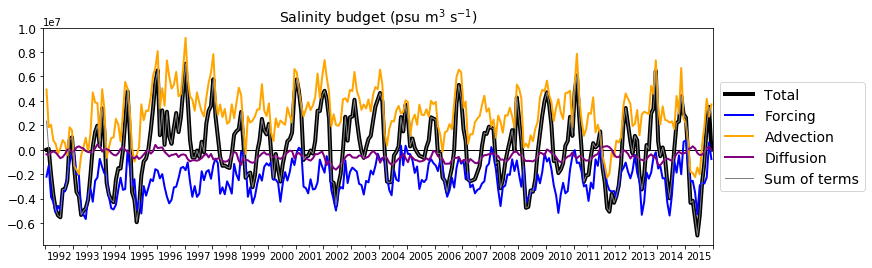

In [22]:
fig, ax = plt.subplots(figsize=(12,4))
ax.set_title(r'Salinity budget (psu m$^3$ s$^{-1}$)',fontsize=14)

ax.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
ax.plot(results[0].time, results[0], lw=4, color='black',label='Total')
ax.plot(results[1].time, results[1], lw=2, color='blue',label='Forcing')
ax.plot(results[2].time, results[2], lw=2, color='orange',label='Advection')
ax.plot(results[3].time, results[3], lw=2, color='purple',label='Diffusion')
ax.plot(results[5].time, results[5], lw=1, color='grey',label='Sum of terms')

ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_minor_locator(dates.YearLocator(month=7))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%Y'))
for tick in ax.xaxis.get_minor_ticks():
    tick.label.set_fontsize(10)

ax.set_xlim(['1991-12-01','2016-01-01'])
#plt.ylim([-0.8e7, 1.0e7])
ax.yaxis.set_tick_params(labelsize=12)
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5),fontsize=14)

#plt.savefig('/tmp/figure.png')
plt.show()

In [11]:
ds = xr.Dataset(data_vars={})

ds['tendSln'] = results[0]
ds['forcSln'] = results[1]
ds['adv_ConvSln'] = results[2]
ds['dif_ConvSln'] = results[3]
ds['totalSln'] = results[5]

In [12]:
ds_anom = ds.groupby('time.month') - ds.groupby('time.month').mean('time')

In [25]:
results = dask.compute(ds_anom.tendSln, ds_anom.forcSln, ds_anom.adv_ConvSln, ds_anom.dif_ConvSln)

In [13]:
totalSln_anom = results[1] + results[2] + results[3]

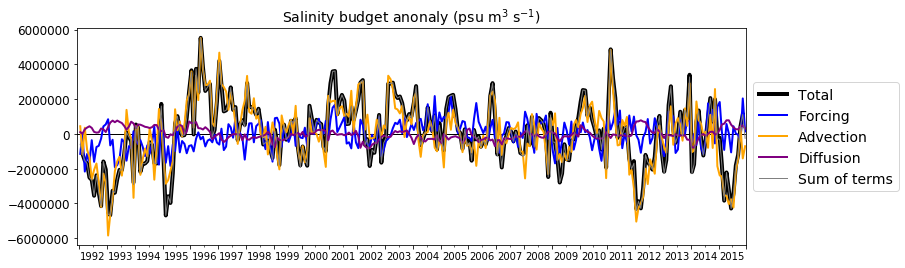

In [27]:
fig, ax = plt.subplots(figsize=(12,4))
ax.set_title(r'Salinity budget anonaly (psu m$^3$ s$^{-1}$)',fontsize=14)

ax.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
ax.plot(results[0].time[1:-1], results[0][1:-1], lw=4, color='black',label='Total')
ax.plot(results[1].time, results[1], lw=2, color='blue',label='Forcing')
ax.plot(results[2].time, results[2], lw=2, color='orange',label='Advection')
ax.plot(results[3].time, results[3], lw=2, color='purple',label='Diffusion')
ax.plot(totalSln_anom.time, totalSln_anom, lw=1, color='grey',label='Sum of terms')

ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_minor_locator(dates.YearLocator(month=7))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%Y'))
for tick in ax.xaxis.get_minor_ticks():
    tick.label.set_fontsize(10)
    
ax.set_xlim(['1991-12-01','2016-01-01'])
ax.yaxis.set_tick_params(labelsize=12)
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5),fontsize=14)

#plt.savefig('/tmp/figure.png')
plt.show()

## Fluxes at the boundaries

In [14]:
# Horizontal volume transports (m^3/s)
u_transport = ecco.UVELMASS * ecco.dyG * ecco.drF
v_transport = ecco.VVELMASS * ecco.dxG * ecco.drF

### Western boundary

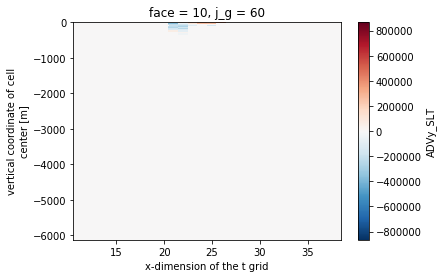

In [15]:
ecco.ADVy_SLT[:,:,1,west1,north1:south1+1].mean('time').swap_dims({'k':'Z'}).plot()

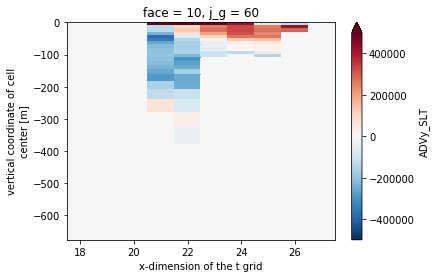

In [16]:
ecco.ADVy_SLT[:,:,1,west1,18:28].mean('time')[:25].swap_dims({'k':'Z'}).plot(vmin=-5e5)

In [17]:
adv_west = ecco.ADVy_SLT[:,:,1,west1,north1:south1+1].sum(dim=['k','i'])

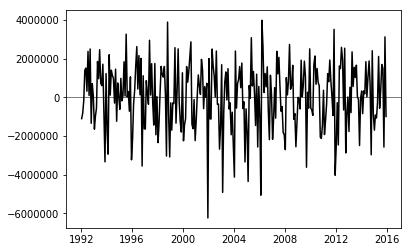

In [18]:
plt.axhline(y=0, xmin=0, xmax=1, linewidth=0.5, color = 'k')
plt.plot(adv_west.time,adv_west,'k',label='west (Hudson Strait)')

### Northern boundary

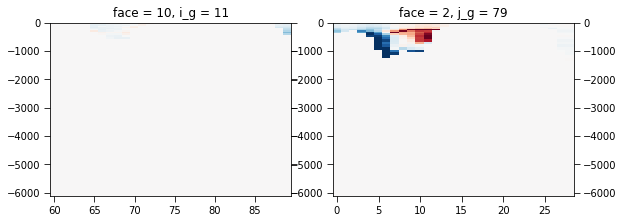

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(8,3))
fig.tight_layout()

plt.subplot(1, 2, 1)
(ecco.ADVx_SLT[:,:,1,west1:,north1]*-1).mean('time').swap_dims({'k':'Z'}).plot(vmin=-1e7, vmax=1e7, cmap='RdBu_r',
                                                                              add_colorbar=False)
plt.xlabel('')
plt.ylabel('')
plt.tick_params(length=6,right=True)

plt.subplot(1, 2, 2)
ecco.ADVy_SLT[:,:,0,north0+1,:east0].mean('time').swap_dims({'k':'Z'}).plot(vmin=-1e7, vmax=1e7, cmap='RdBu_r',
                                                                            add_colorbar=False)
plt.xlabel('')
plt.ylabel('')
plt.tick_params(length=6,right=True,labelright=True)

plt.show()

#### Davis Strait

In [20]:
westDaS = 65
eastDaS = 73

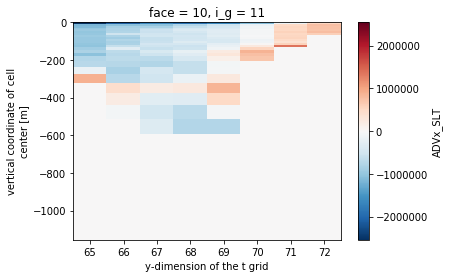

In [21]:
(ecco.ADVx_SLT[:,:,1,westDaS:eastDaS,north1]*-1).mean('time')[:30].swap_dims({'k':'Z'}).plot()

In [22]:
adv_northDaS = -ecco.ADVx_SLT[:,:,1,westDaS:eastDaS,north1].sum(dim=['k','j'])

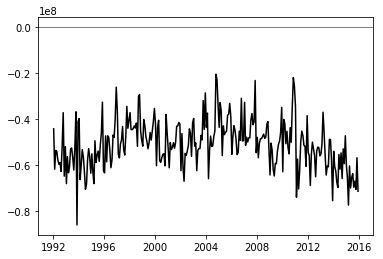

In [23]:
plt.axhline(y=0, xmin=0, xmax=1, linewidth=0.5, color = 'k')
plt.plot(adv_northDaS.time,adv_northDaS,'k',label='Davis Strait')

#### Denmark Strait

In [24]:
westDeS1 = 88

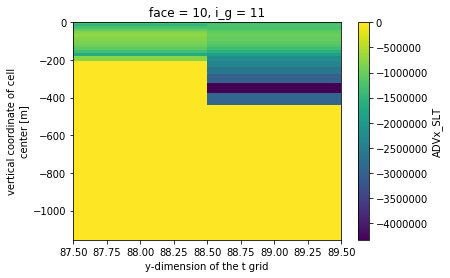

In [25]:
(ecco.ADVx_SLT[:,:,1,westDeS1:,north1]*-1).mean('time')[:30].swap_dims({'k':'Z'}).plot()

In [26]:
adv_northDeS1 = -ecco.ADVx_SLT[:,:,1,westDeS1:,north1].sum(dim=['k','j'])

In [27]:
eastDeS0 = 15

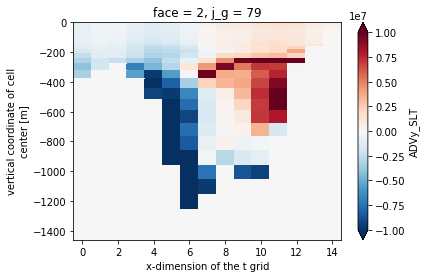

In [28]:
ecco.ADVy_SLT[:,:,0,north0+1,:eastDeS0].mean('time')[:33].swap_dims({'k':'Z'}).plot(vmin=-1e7)

In [29]:
adv_northDeS0 = ecco.ADVy_SLT[:,:,0,north0+1,:eastDeS0].sum(dim=['k','i'])
adv_northDeS = adv_northDeS0+adv_northDeS1

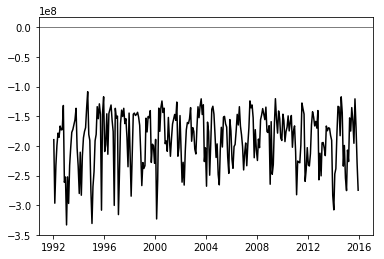

In [30]:
plt.axhline(y=0, xmin=0, xmax=1, linewidth=0.5, color = 'k')
plt.plot(adv_northDeS.time,adv_northDeS,'k',label='Denmark Strait')

#### `face 10`

In [31]:
adv_north1 = -ecco.ADVx_SLT[:,:,1,west1:,north1].sum(dim=['k','j'])

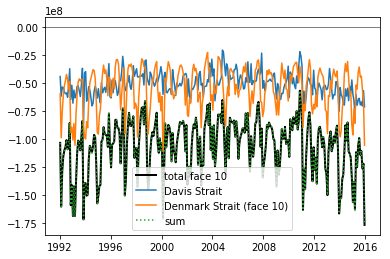

In [32]:
plt.axhline(y=0, xmin=0, xmax=1, linewidth=0.5, color = 'k')
plt.plot(adv_north1.time,adv_north1,'k',lw=2,label='total face 10')
plt.plot(adv_northDaS.time,adv_northDaS,label='Davis Strait')
plt.plot(adv_northDeS1.time,adv_northDeS1,label='Denmark Strait (face 10)')
plt.plot(adv_northDaS.time,adv_northDeS1+adv_northDaS,ls=':',label='sum')
plt.legend()

#### Nordic Sea (north)

In [33]:
westNS0 = 24

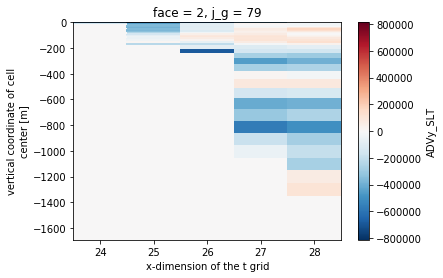

In [34]:
ecco.ADVy_SLT[:,:,0,north0+1,westNS0:east0].mean('time')[:35].swap_dims({'k':'Z'}).plot()

In [35]:
adv_northNS0 = ecco.ADVy_SLT[:,:,0,north0+1,westNS0:east0].sum(dim=['k','i'])

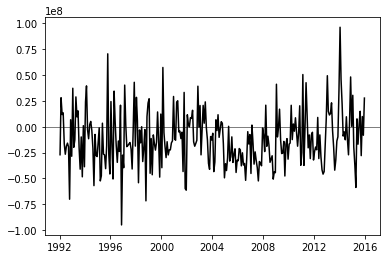

In [36]:
plt.axhline(y=0, xmin=0, xmax=1, linewidth=0.5, color = 'k')
plt.plot(adv_northNS0.time,adv_northNS0,'k',label='Nordic Sea (north)')

#### `face 2`

In [37]:
adv_north0 = ecco.ADVy_SLT[:,:,0,north0+1,:east0].sum(dim=['k','i'])

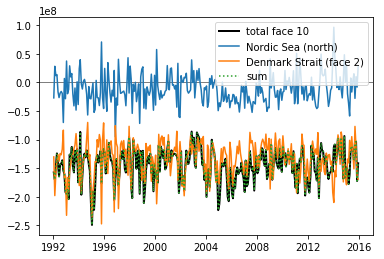

In [38]:
plt.axhline(y=0, xmin=0, xmax=1, linewidth=0.5, color = 'k')
plt.plot(adv_north0.time,adv_north0,'k',lw=2,label='total face 10')
plt.plot(adv_northNS0.time,adv_northNS0,label='Nordic Sea (north)')
plt.plot(adv_northDeS0.time,adv_northDeS0,label='Denmark Strait (face 2)')
plt.plot(adv_northNS0.time,adv_northNS0+adv_northDeS0,ls=':',label='sum')
plt.legend()

#### Total

In [39]:
adv_north = adv_north0 + adv_north1

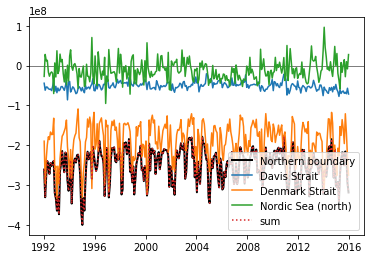

In [40]:
plt.axhline(y=0, xmin=0, xmax=1, linewidth=0.5, color = 'k')
plt.plot(adv_north.time,adv_north,'k',lw=2,label='Northern boundary')
plt.plot(adv_northDaS.time,adv_northDaS,label='Davis Strait')
plt.plot(adv_northDeS.time,adv_northDeS,label='Denmark Strait')
plt.plot(adv_northNS0.time,adv_northNS0,label='Nordic Sea (north)')
plt.plot(adv_north.time,adv_northDaS+adv_northDeS+adv_northNS0,ls=':',label='sum')
plt.legend()

### Southern boundary

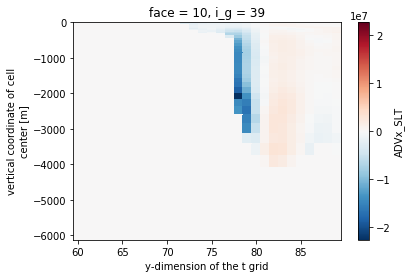

In [41]:
(ecco.ADVx_SLT[:,:,1,west1:,south1+1]*-1).mean('time').swap_dims({'k':'Z'}).plot()

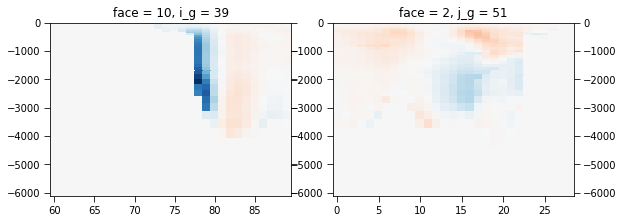

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(8,3))
fig.tight_layout()

plt.subplot(1, 2, 1)
(ecco.ADVx_SLT[:,:,1,west1:,south1+1]*-1).mean('time').swap_dims({'k':'Z'}).plot(vmin=-2e7, vmax=2e7, cmap='RdBu_r',
                                                                                 add_colorbar=False)
plt.xlabel('')
plt.ylabel('')
plt.tick_params(length=6,right=True)

plt.subplot(1, 2, 2)
ecco.ADVy_SLT[:,:,0,south0,:east0].mean('time').swap_dims({'k':'Z'}).plot(vmin=-2e7, vmax=2e7, cmap='RdBu_r',
                                                                          add_colorbar=False)
plt.xlabel('')
plt.ylabel('')
plt.tick_params(length=6,right=True,labelright=True)

plt.show()

In [43]:
adv_south0 = ecco.ADVy_SLT[:,:,0,south0,:east0].sum(dim=['k','i'])
adv_south1 = -ecco.ADVx_SLT[:,:,1,west1:,south1+1].sum(dim=['k','j'])
adv_south = adv_south0 + adv_south1

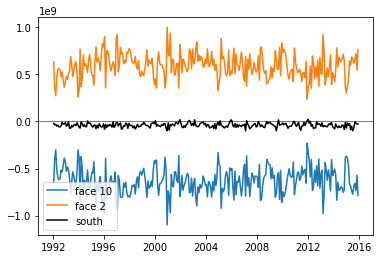

In [44]:
plt.axhline(y=0, xmin=0, xmax=1, linewidth=0.5, color = 'k')
plt.plot(adv_south1.time,adv_south1,label='face 10')
plt.plot(adv_south0.time,adv_south0,label='face 2')
plt.plot(adv_south.time,adv_south,'k',label='south')
plt.legend()

### Eastern boundary

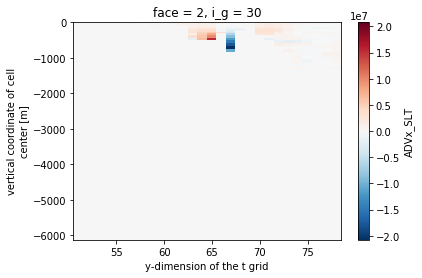

In [45]:
ecco.ADVx_SLT[:,:,0,south0:north0+1,east0+1].mean('time').swap_dims({'k':'Z'}).plot()

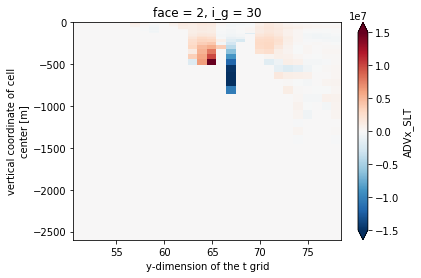

In [46]:
ecco.ADVx_SLT[:,:,0,south0:north0+1,east0+1].mean('time')[:40].swap_dims({'k':'Z'}).plot(vmin=-1.5e7, vmax=1.5e7, 
                                                                                         cmap='RdBu_r')

In [47]:
adv_east = ecco.ADVx_SLT[:,:,0,south0:north0+1,east0].sum(dim=['k','j'])

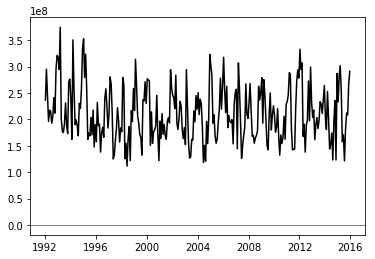

In [48]:
plt.axhline(y=0, xmin=0, xmax=1, linewidth=0.5, color = 'k')
plt.plot(adv_east.time,adv_east,'k',label='east (Nordic Sea)')

#### Nordic Sea

In [49]:
adv_northNS = adv_northNS0+adv_east

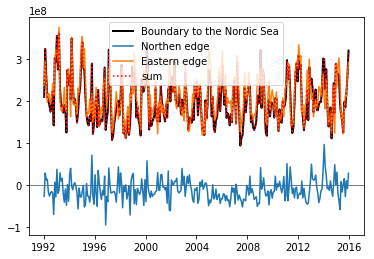

In [50]:
plt.axhline(y=0, xmin=0, xmax=1, linewidth=0.5, color = 'k')
plt.plot(adv_northNS.time,adv_northNS,'k',lw=2,label='Boundary to the Nordic Sea')
plt.plot(adv_northNS0.time,adv_northNS0,label='Northen edge')
plt.plot(adv_east.time,adv_east,label='Eastern edge')
plt.plot(adv_east.time,adv_east+adv_northNS0,ls=':',c='r',label='sum')

plt.legend()

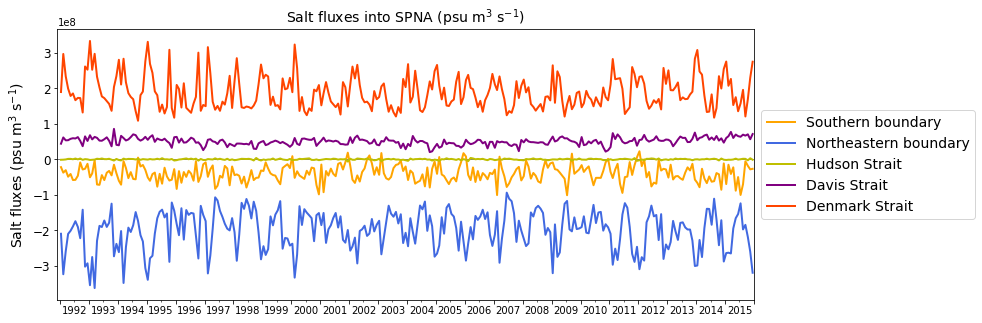

In [54]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title(r'Salt fluxes into SPNA (psu m$^3$ s$^{-1}$)',fontsize=14)

ax.axhline(y=0, xmin=0, xmax=1, linewidth=0.5, color = 'k')
ax.plot(adv_south.time, adv_south, c='orange', lw=2, label = 'Southern boundary')
ax.plot(adv_northNS.time,-adv_northNS, c='royalblue', lw=2, label ='Northeastern boundary')
ax.plot(adv_west.time,adv_west, c='y',lw=2, label='Hudson Strait')
ax.plot(adv_northDaS.time,-adv_northDaS, c='purple', lw=2, label='Davis Strait')
ax.plot(adv_northDeS.time,-adv_northDeS, c='orangered', lw=2, label='Denmark Strait')

ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_minor_locator(dates.YearLocator(month=7))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%Y'))
for tick in ax.xaxis.get_minor_ticks():
    tick.label.set_fontsize(10)

ax.set_ylabel(r'Salt fluxes (psu m$^3$ s$^{-1}$)',fontsize=14)

ax.set_xlim(['1991-12-01','2016-01-01'])
#ax.set_ylim([-4e8, 3.5e8])
ax.yaxis.set_tick_params(labelsize=12)

ax.legend(loc='center left',bbox_to_anchor=(1, 0.5),fontsize=14)
fig.subplots_adjust(right=0.77)

plt.savefig('/tmp/figure.png')
plt.show()

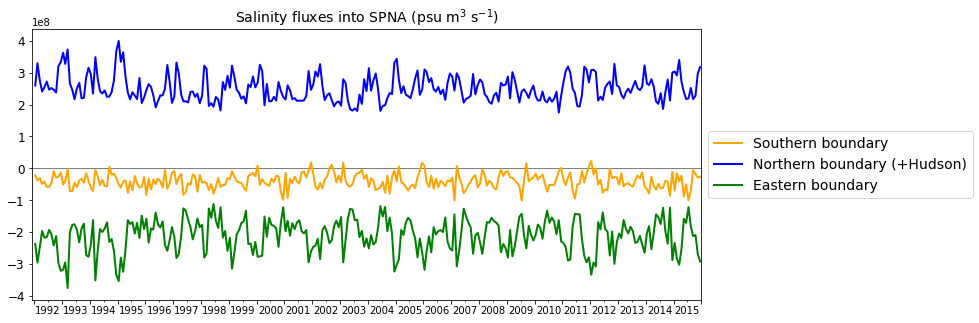

In [71]:
fig, ax = plt.subplots(figsize=(12,5))
ax.set_title(r'Salinity fluxes into SPNA (psu m$^3$ s$^{-1}$)',fontsize=14)

ax.axhline(y=0, xmin=0, xmax=1, linewidth=0.5, color = 'k')
ax.plot(adv_south.time, adv_south, c='orange', lw=2, label = 'Southern boundary')
ax.plot(adv_north.time,-adv_north+adv_west, c='blue', lw=2, label ='Northern boundary (+Hudson)')
ax.plot(adv_east.time, -adv_east, c='green', lw=2, label='Eastern boundary')

ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_minor_locator(dates.YearLocator(month=7))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%Y'))
for tick in ax.xaxis.get_minor_ticks():
    tick.label.set_fontsize(10)

ax.set_xlim(['1991-12-01','2016-01-01'])
#ax.set_ylim([-4e8, 3.5e8])
ax.yaxis.set_tick_params(labelsize=12)

ax.legend(loc='center left',bbox_to_anchor=(1, 0.5),fontsize=14)
#fig.subplots_adjust(right=0.5)

#plt.savefig('/tmp/figure.png')
plt.show()

In [72]:
adv_northeast = adv_west-adv_north-adv_east

In [73]:
FlxConvS = adv_west-adv_northDaS-adv_northDeS-adv_northNS+adv_south

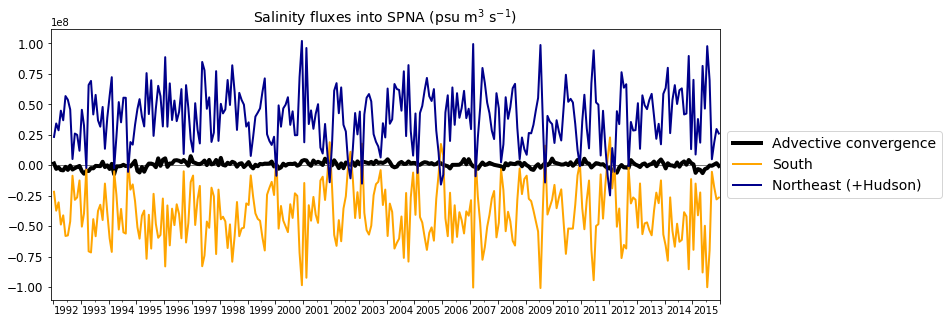

In [77]:
fig, ax = plt.subplots(figsize=(12,5))
ax.set_title(r'Salinity fluxes into SPNA (psu m$^3$ s$^{-1}$)',fontsize=14)

ax.axhline(y=0, xmin=0, xmax=1, linewidth=0.5, color = 'k')
ax.plot(FlxConvS.time, FlxConvS, c='black', lw=4, label='Advective convergence')
ax.plot(adv_south.time, adv_south, c='orange', lw=2, label = 'South')
ax.plot(adv_northeast.time,adv_northeast, c='darkblue', lw=2, label ='Northeast (+Hudson)')

ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_minor_locator(dates.YearLocator(month=7))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%Y'))
for tick in ax.xaxis.get_minor_ticks():
    tick.label.set_fontsize(10)

ax.set_xlim(['1991-12-01','2016-01-01'])
#ax.set_ylim([-4e8, 3.5e8])
ax.yaxis.set_tick_params(labelsize=12)

ax.legend(loc='center left',bbox_to_anchor=(1, 0.5),fontsize=14)
#fig.subplots_adjust(right=0.5)

plt.savefig('/tmp/figure.png')
plt.show()

In [78]:
adv_NordicSea = adv_northNS+adv_northDeS

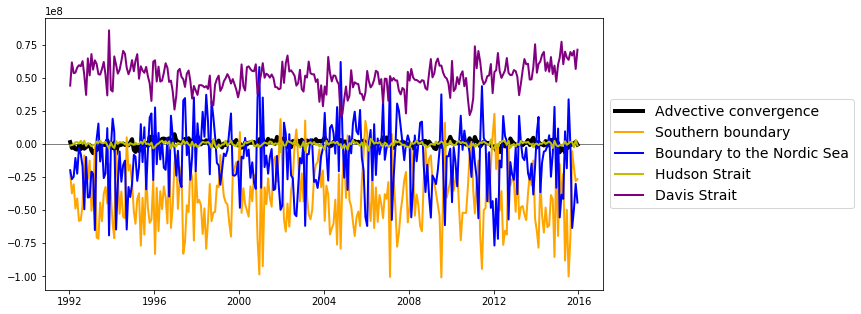

In [80]:
plt.figure(figsize=(10,5))
ax.set_title(r'Salinity fluxes into SPNA (psu m$^3$ s$^{-1}$)',fontsize=14)

plt.axhline(y=0, xmin=0, xmax=1, linewidth=0.5, color = 'k')
plt.plot(FlxConvS.time, FlxConvS, c='k', lw=4, label = 'Advective convergence')
plt.plot(adv_south.time, adv_south, c='orange', lw=2, label = 'Southern boundary')
plt.plot(adv_NordicSea.time,-adv_NordicSea, c='blue', lw=2, label ='Boundary to the Nordic Sea')
plt.plot(adv_west.time,adv_west, c='y',lw=2, label='Hudson Strait')
plt.plot(adv_northDaS.time,-adv_northDaS, c='purple', lw=2, label='Davis Strait')

plt.legend(loc='center left',bbox_to_anchor=(1, 0.5),fontsize=14)

plt.show()

In [81]:
# Total convergence of volume flux
ConvV = budg_vol.hConvV + budg_vol.vConvV

ConvVSln0 = (ConvV[:,0,:,south0:north0+1,:east0]*ecco.SALT[:,:,0,south0:north0+1,:east0]).sum(dim=['k','j','i'])
ConvVSln1 = (ConvV[:,1,:,west1:,north1:south1+1]*ecco.SALT[:,:,1,west1:,north1:south1+1]).sum(dim=['k','j','i'])
ConvVSln = ConvVSln0 + ConvVSln1

In [82]:
FlxConvSln = FlxConvS-ConvVSln

/opt/rh/python27/root/usr/lib/python2.7/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in multiply
  return func(*args2)


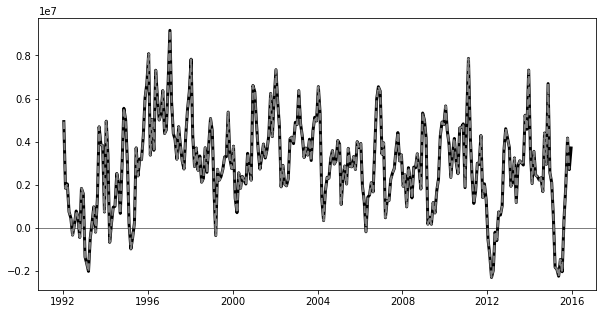

In [83]:
plt.figure(figsize=(10,5))

plt.axhline(y=0, xmin=0, xmax=1, linewidth=0.5, color = 'k')
plt.plot(adv_ConvSln.time, adv_ConvSln, lw=3, color='black', label='Convergence (budg)')
plt.plot(FlxConvSln.time, FlxConvSln, lw=2, color='grey', linestyle='--', label='Convergence (fluxes)')

plt.show()

### Seasonal Anomalies

In [84]:
ds = xr.Dataset(data_vars={})

ds['tendSln'] = tendSln
ds['forcSln'] = forcSln
ds['adv_ConvSln'] = adv_ConvSln
ds['dif_ConvSln'] = dif_ConvSln
ds['FlxConvSln'] = FlxConvSln
ds['FlxConvS'] = FlxConvS
ds['ConvVSln'] = ConvVSln
ds['adv_west'] = adv_west
ds['adv_northDaS'] = -adv_northDaS
ds['adv_northDeS'] = -adv_northDeS
ds['adv_northNS'] = -adv_northNS
ds['adv_south'] = adv_south

In [85]:
ds_anom = ds.groupby('time.month') - ds.groupby('time.month').mean('time')

In [86]:
total_flux = ds_anom.adv_west+ds_anom.adv_south+ds_anom.adv_northDaS+ds_anom.adv_northDeS+ds_anom.adv_northNS

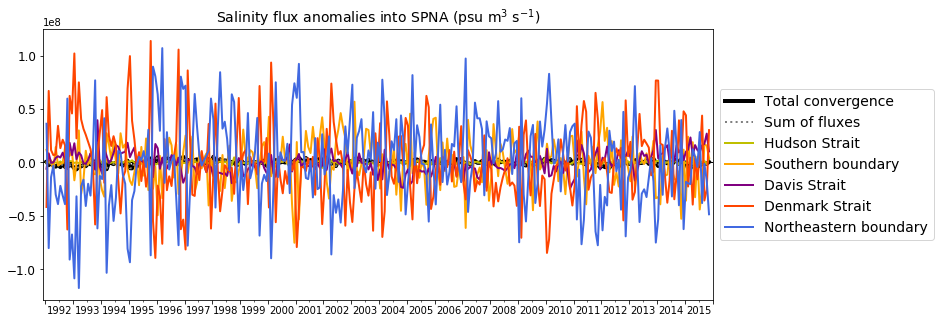

In [87]:
fig, ax = plt.subplots(figsize=(12,5))
ax.set_title(r'Salinity flux anomalies into SPNA (psu m$^3$ s$^{-1}$)',fontsize=14)

ax.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
ax.plot(ds_anom.time, ds_anom.FlxConvS, lw=4, color='black',label='Total convergence')
ax.plot(total_flux.time, total_flux, lw=2, color='grey',ls=':', label='Sum of fluxes')

ax.plot(ds_anom.time, ds_anom.adv_west, lw=2, color='y',label='Hudson Strait')
ax.plot(ds_anom.time, ds_anom.adv_south, lw=2, color='orange',label='Southern boundary')
ax.plot(ds_anom.time, ds_anom.adv_northDaS, lw=2, color='purple',label='Davis Strait')
ax.plot(ds_anom.time, ds_anom.adv_northDeS, lw=2, color='orangered',label='Denmark Strait')
ax.plot(ds_anom.time, ds_anom.adv_northNS, lw=2, color='royalblue',label='Northeastern boundary')

ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_minor_locator(dates.YearLocator(month=7))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%Y'))
for tick in ax.xaxis.get_minor_ticks():
    tick.label.set_fontsize(10)

#ax.set_ylim([-4e8, 3.5e8])
ax.yaxis.set_tick_params(labelsize=12)
ax.set_xlim(['1991-12-01','2016-01-01'])
ax.legend(loc='center left',bbox_to_anchor=(1, 0.5),fontsize=14)

#plt.savefig('/tmp/figure.png')
plt.show()

In [88]:
df = pd.DataFrame({'total':ds_anom.FlxConvS,
                   'west':ds_anom.adv_west,
                   'south':ds_anom.adv_south,
                   'northDaS':ds_anom.adv_northDaS,
                   'northDeS':ds_anom.adv_northDeS,
                   'northNS':ds_anom.adv_northNS})

In [89]:
cov_ratio = pd.Series({term: df['total'].cov(df[term]) for term in df if term != 'total'})/np.var(df.total,ddof=1)

In [90]:
cov_ratio

northDaS   -1.095072
northDeS   -3.973535
northNS     6.770481
south      -0.628166
west       -0.073708
dtype: float64

In [91]:
corr = pd.Series({term: df['total'].corr(df[term]) for term in df if term != 'total'})

In [92]:
corr

northDaS   -0.257199
northDeS   -0.254905
northNS     0.372268
south      -0.067981
west       -0.119544
dtype: float64

### Integrated form

In [105]:
ds = xr.Dataset(data_vars={})

ds['tendSln'] = tendSln
ds['forcSln'] = forcSln
ds['adv_ConvSln'] = adv_ConvSln
ds['dif_ConvSln'] = dif_ConvSln
ds['FlxConvSln'] = FlxConvSln
ds['FlxConvS'] = FlxConvS
ds['ConvVSln'] = ConvVSln
ds['adv_west'] = adv_west
ds['adv_northDaS'] = -adv_northDaS
ds['adv_northDeS'] = -adv_northDeS
ds['adv_northNS'] = -adv_northNS
ds['adv_south'] = adv_south

In [106]:
vol_spna = vol[0,:,south0:north0+1,:east0].sum(dim=['k','j','i']) \
            + vol[1,:,west1:,north1:south1+1].sum(dim=['k','j','i'])

In [107]:
ds_int = (ds.isel(time=slice(1, -1))*budg.isel(time=slice(1, -1)).dt).cumsum(dim='time')/vol_spna
ds_int['time'] = ecco.time.isel(time=slice(1, -1))

In [108]:
results = dask.compute(ds_int.tendSln,
                       ds_int.forcSln,
                       ds_int.adv_ConvSln,
                       ds_int.dif_ConvSln, 
                       ds_int.FlxConvSln,
                       ds_int.FlxConvS,
                       ds_int.ConvVSln,
                       ds_int.adv_west,
                       ds_int.adv_northDaS,
                       ds_int.adv_northDeS,
                       ds_int.adv_northNS,
                       ds_int.adv_south)

In [109]:
ds_dtr = xr.Dataset(data_vars={})

ds_dtr['tendSln'] = xr.DataArray(signal.detrend(results[0]),coords=[results[0].time],dims=['time'])
ds_dtr['forcSln'] = xr.DataArray(signal.detrend(results[1]),coords=[results[1].time],dims=['time'])
ds_dtr['adv_ConvSln'] = xr.DataArray(signal.detrend(results[2]),coords=[results[2].time],dims=['time'])
ds_dtr['dif_ConvSln'] = xr.DataArray(signal.detrend(results[3]),coords=[results[3].time],dims=['time'])
ds_dtr['FlxConvSln'] = xr.DataArray(signal.detrend(results[4]),coords=[results[4].time],dims=['time'])
ds_dtr['FlxConvS'] = xr.DataArray(signal.detrend(results[5]),coords=[results[5].time],dims=['time'])
ds_dtr['ConvVSln'] = xr.DataArray(signal.detrend(results[6]),coords=[results[6].time],dims=['time'])
ds_dtr['adv_west'] = xr.DataArray(signal.detrend(results[7]),coords=[results[7].time],dims=['time'])
ds_dtr['adv_northDaS'] = xr.DataArray(signal.detrend(results[8]),coords=[results[8].time],dims=['time'])
ds_dtr['adv_northDeS'] = xr.DataArray(signal.detrend(results[9]),coords=[results[9].time],dims=['time'])
ds_dtr['adv_northNS'] = xr.DataArray(signal.detrend(results[10]),coords=[results[10].time],dims=['time'])
ds_dtr['adv_south'] = xr.DataArray(signal.detrend(results[11]),coords=[results[11].time],dims=['time'])

In [110]:
# Sum of terms (C m^3/s)
totalSln = ds_dtr.forcSln + ds_dtr.dif_ConvSln + ds_dtr.adv_ConvSln

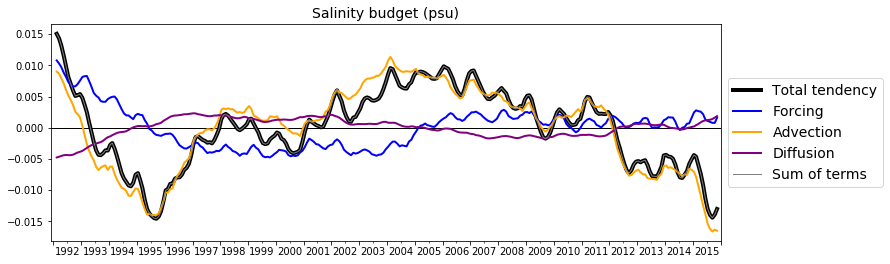

In [111]:
fig, ax = plt.subplots(figsize=(12,4))
ax.set_title(r'Salinity budget (psu)',fontsize=14)

ax.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
ax.plot(ds_dtr.time, ds_dtr.tendSln, lw=4, color='black',label='Total tendency')
ax.plot(ds_dtr.time, ds_dtr.forcSln, lw=2, color='blue',label='Forcing')
ax.plot(ds_dtr.time, ds_dtr.adv_ConvSln, lw=2, color='orange',label='Advection')
ax.plot(ds_dtr.time, ds_dtr.dif_ConvSln, lw=2, color='purple',label='Diffusion')
ax.plot(totalSln.time, totalSln, lw=1, color='grey',label='Sum of terms')

ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_minor_locator(dates.YearLocator(month=7))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%Y'))
for tick in ax.xaxis.get_minor_ticks():
    tick.label.set_fontsize(10)
       
ax.set_xlim(['1991-12-01','2016-01-01'])
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5),fontsize=14)

plt.show()

In [112]:
ds_anom = ds_dtr.groupby('time.month') - ds_dtr.groupby('time.month').mean('time')

In [113]:
# Sum of terms (psu m^3/s)
totalSln_anom = ds_anom.forcSln + ds_anom.dif_ConvSln + ds_anom.adv_ConvSln

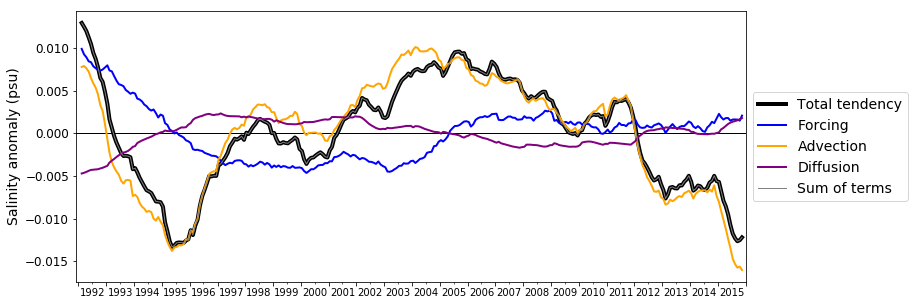

In [114]:
fig, ax = plt.subplots(figsize=(12,5))
#ax.set_title(r'Salinity anomaly budget (psu)',fontsize=14)

ax.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
ax.plot(ds_anom.time, ds_anom.tendSln, lw=4, color='black',label='Total tendency')
ax.plot(ds_anom.time, ds_anom.forcSln, lw=2, color='blue',label='Forcing')
ax.plot(ds_anom.time, ds_anom.adv_ConvSln, lw=2, color='orange',label='Advection')
ax.plot(ds_anom.time, ds_anom.dif_ConvSln, lw=2, color='purple',label='Diffusion')
ax.plot(totalSln_anom.time, totalSln_anom, lw=1, color='grey',label='Sum of terms')
ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_minor_locator(dates.YearLocator(month=7))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%Y'))
for tick in ax.xaxis.get_minor_ticks():
    tick.label.set_fontsize(10)
    
ax.yaxis.set_tick_params(labelsize=12)
#ax.set_ylim([-0.24,0.18])
ax.set_ylabel(r'Salinity anomaly (psu)',fontsize=14)
ax.set_xlim(['1991-12-01','2016-01-01'])
ax.legend(loc='center left',bbox_to_anchor=(1, 0.5),fontsize=14)

#fig.subplots_adjust(right=0.5)

#plt.savefig('/tmp/figure.png')
plt.show()

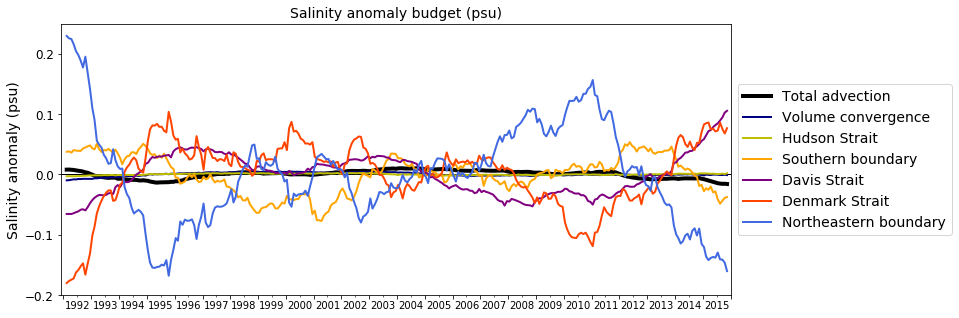

In [115]:
fig, ax = plt.subplots(figsize=(12,5))

ax.set_title(r'Salinity anomaly budget (psu)',fontsize=14)
ax.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
ax.plot(ds_anom.time, ds_anom.adv_ConvSln, lw=4, color='k',label='Total advection')
ax.plot(ds_anom.time, -ds_anom.ConvVSln, lw=2, color='navy',label='Volume convergence')

ax.plot(ds_anom.time, ds_anom.adv_west, lw=2, color='y',label='Hudson Strait')
ax.plot(ds_anom.time, ds_anom.adv_south, lw=2, color='orange',label='Southern boundary')
ax.plot(ds_anom.time, ds_anom.adv_northDaS, lw=2, color='purple',label='Davis Strait')
ax.plot(ds_anom.time, ds_anom.adv_northDeS, lw=2, color='orangered',label='Denmark Strait')
ax.plot(ds_anom.time, ds_anom.adv_northNS, lw=2, color='royalblue',label='Northeastern boundary')

ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_minor_locator(dates.YearLocator(month=7))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%Y'))
for tick in ax.xaxis.get_minor_ticks():
    tick.label.set_fontsize(10)

ax.yaxis.set_tick_params(labelsize=12)
#ax.set_ylim([-0.17,0.11])
ax.set_ylabel(r'Salinity anomaly (psu)',fontsize=14)
ax.set_xlim(['1991-12-01','2016-01-01'])
ax.legend(loc='center left',bbox_to_anchor=(1, 0.5),fontsize=14)

#plt.savefig('/tmp/figure.png')
plt.show()

In [116]:
northeast = ds_anom.adv_northNS+ds_anom.adv_northDeS
northwest = ds_anom.adv_west+ds_anom.adv_northDaS

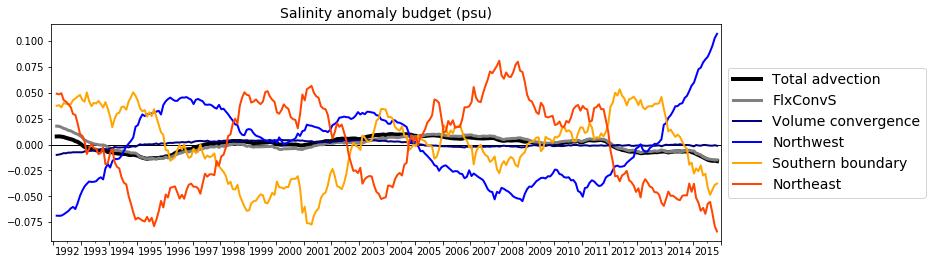

In [117]:
fig, ax = plt.subplots(figsize=(12,4))
ax.set_title(r'Salinity anomaly budget (psu)',fontsize=14)

ax.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
ax.plot(ds_anom.time, ds_anom.adv_ConvSln, lw=4, color='black',label='Total advection')
ax.plot(ds_anom.time, ds_anom.FlxConvS, lw=3, color='grey',label='FlxConvS')
ax.plot(ds_anom.time, -ds_anom.ConvVSln, lw=2, color='navy',label='Volume convergence')

ax.plot(northwest.time, northwest, lw=2, color='blue',label='Northwest')
ax.plot(ds_anom.time, ds_anom.adv_south, lw=2, color='orange',label='Southern boundary')
ax.plot(northeast.time, northeast, lw=2, color='orangered',label='Northeast')

ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_minor_locator(dates.YearLocator(month=7))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%Y'))
for tick in ax.xaxis.get_minor_ticks():
    tick.label.set_fontsize(10)
    
ax.set_xlim(['1991-12-01','2016-01-01'])
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5),fontsize=14)

plt.show()

In [118]:
NAbasin = ds_anom.adv_south+northeast

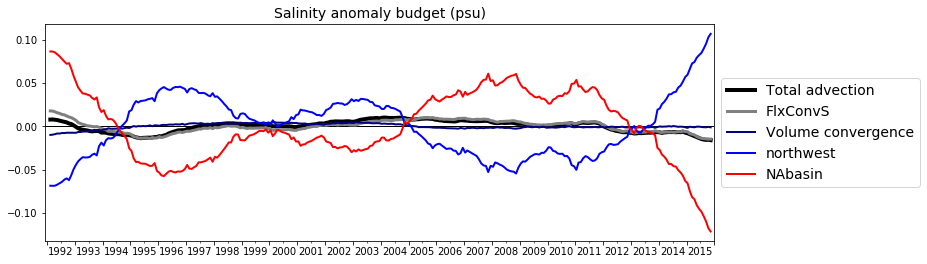

In [119]:
fig, ax = plt.subplots(figsize=(12,4))
ax.set_title(r'Salinity anomaly budget (psu)',fontsize=14)

ax.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
ax.plot(ds_anom.time, ds_anom.adv_ConvSln, lw=4, color='black',label='Total advection')
ax.plot(ds_anom.time, ds_anom.FlxConvS, lw=3, color='grey',label='FlxConvS')
ax.plot(ds_anom.time, -ds_anom.ConvVSln, lw=2, color='navy',label='Volume convergence')

ax.plot(northwest.time, northwest, lw=2, color='blue',label='northwest')
ax.plot(NAbasin.time, NAbasin, lw=2, color='red',label='NAbasin')

ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_minor_locator(dates.YearLocator(month=7))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%Y'))
for tick in ax.xaxis.get_minor_ticks():
    tick.label.set_fontsize(10)
    
ax.set_xlim(['1991-12-01','2016-01-01'])
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5),fontsize=14)

plt.show()

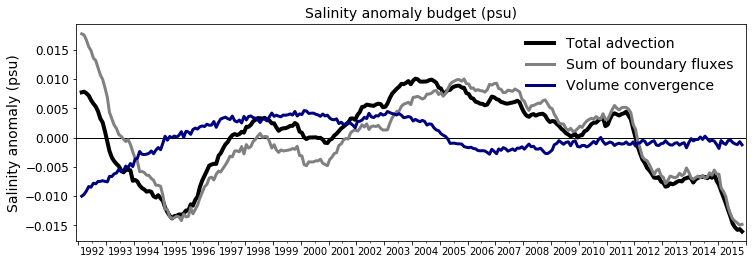

In [126]:
fig, ax = plt.subplots(figsize=(12,4))
ax.set_title(r'Salinity anomaly budget (psu)',fontsize=14)

ax.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
ax.plot(ds_anom.time, ds_anom.adv_ConvSln, lw=4, color='black',label='Total advection')
ax.plot(ds_anom.time, ds_anom.FlxConvS, lw=3, color='grey',label='Sum of boundary fluxes')
ax.plot(ds_anom.time, -ds_anom.ConvVSln, lw=3, color='navy',label='Volume convergence')

ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_minor_locator(dates.YearLocator(month=7))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%Y'))
for tick in ax.xaxis.get_minor_ticks():
    tick.label.set_fontsize(10)
    
ax.set_xlim(['1991-12-01','2016-01-01'])
ax.yaxis.set_tick_params(labelsize=12)
ax.set_ylabel(r'Salinity anomaly (psu)',fontsize=14)
ax.legend(loc='upper right',frameon=False,fontsize=14)

plt.savefig('/tmp/figure.png')
plt.show()